In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import scipy.stats as stats
# from scipy.stats import shapiro 
import pylab as pl

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df_global = pd.read_csv('Data/Processed/global.csv')

# 2. Statistical Analysis

## 2.1 Prepare the data

In [3]:
df_global.rename(columns = {'Exporters':'Country'}, inplace = True)

# Create seperate dataframes for each of the three countries to be analysed
df_ie = df_global[(df_global['Country']=='Ireland')].sort_values(by=['Country','Year'])
df_nl = df_global[(df_global['Country']=='Netherlands')].sort_values(by=['Country','Year'])
df_nz = df_global[(df_global['Country']=='New Zealand')].sort_values(by=['Country','Year'])

# Create Growth columns using pct_change() function
df_ie['Quantity Growth'] = df_ie['Quantity (tonnes)'].pct_change()
df_ie['Value Growth'] = df_ie['Value (k Euro)'].pct_change()
df_ie = df_ie[(df_ie['Year']>=2011)] # Remove the first year as the growth rate will be Nan

df_nl['Quantity Growth'] = df_nl['Quantity (tonnes)'].pct_change()
df_nl['Value Growth'] = df_nl['Value (k Euro)'].pct_change()
df_nl = df_nl[(df_nl['Year']>=2011) & (df_nl['Year']<=2021)]

df_nz['Quantity Growth'] = df_nz['Quantity (tonnes)'].pct_change()
df_nz['Value Growth'] = df_nz['Value (k Euro)'].pct_change()
df_nz = df_nz[(df_nz['Year']>=2011) & (df_nz['Year']<=2021)]

# Combine all three dataframes
df_growth = pd.concat([df_ie,df_nl,df_nz])
df_growth['Year'] = df_growth['Year'].astype('string')

## 2.2 Descriptive Statistics

### 2.2.1 Overview

In [4]:
df_growth.describe()

,Quantity (tonnes),Value (k Euro),Quantity Growth,Value Growth
count,33.000000,3.300000e+01,33.000000,33.000000
mean,225365.757576,8.246978e+05,0.046518,0.087639
std,51126.880538,2.339110e+05,0.085756,0.212208
min,138898.000000,4.229930e+05,-0.138083,-0.302821
25%,181423.000000,6.046470e+05,-0.003988,-0.051483
50%,237042.000000,8.812040e+05,0.038766,0.044378
75%,269147.000000,1.026562e+06,0.084920,0.222944
max,297476.000000,1.212271e+06,0.243316,0.637505


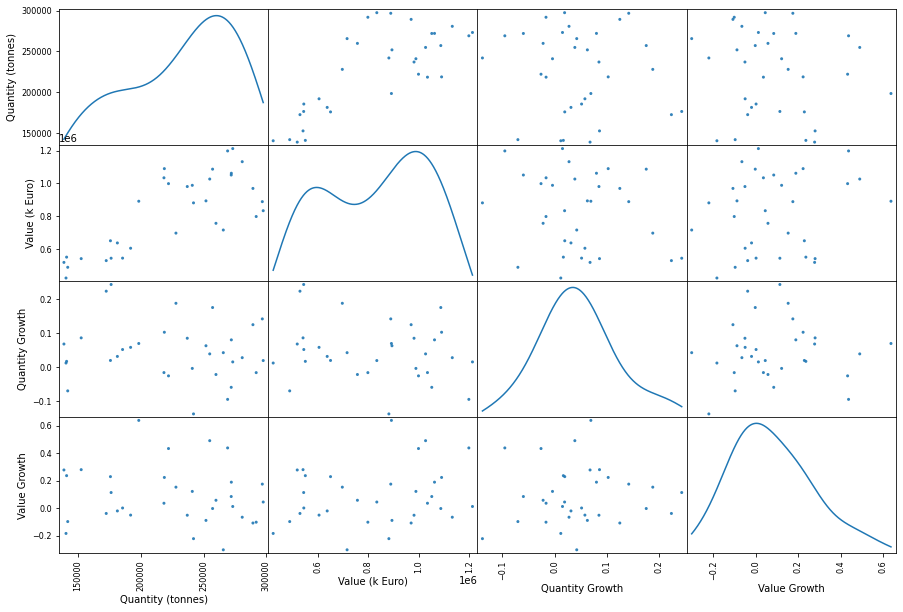

In [5]:
pd.plotting.scatter_matrix(df_growth,diagonal='kde',figsize=(15,10), alpha=0.9);

### 2.2.2 Central Tendency

<AxesSubplot:xlabel='Value Growth'>

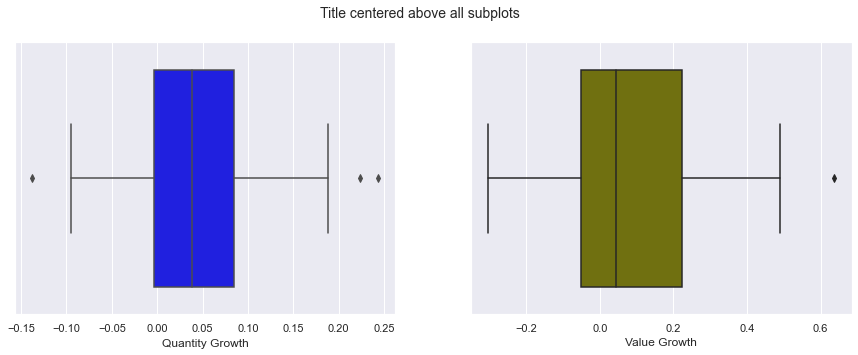

In [6]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Title centered above all subplots", fontsize=14)

sns.boxplot(data=df_growth, x="Quantity Growth", color = 'blue', ax=axs[0])
sns.boxplot(data=df_growth, x="Value Growth", color="olive", ax=axs[1])

In [7]:
df_growth.describe()

,Quantity (tonnes),Value (k Euro),Quantity Growth,Value Growth
count,33.000000,3.300000e+01,33.000000,33.000000
mean,225365.757576,8.246978e+05,0.046518,0.087639
std,51126.880538,2.339110e+05,0.085756,0.212208
min,138898.000000,4.229930e+05,-0.138083,-0.302821
25%,181423.000000,6.046470e+05,-0.003988,-0.051483
50%,237042.000000,8.812040e+05,0.038766,0.044378
75%,269147.000000,1.026562e+06,0.084920,0.222944
max,297476.000000,1.212271e+06,0.243316,0.637505


In [8]:
num_vars = ['Quantity (tonnes)','Value (k Euro)','Quantity Growth','Value Growth']
df_growth[num_vars].median()

Quantity (tonnes)    237042.000000
Value (k Euro)       881204.000000
Quantity Growth           0.038766
Value Growth              0.044378
dtype: float64

### 2.2.3 Distributions

<AxesSubplot:xlabel='Value Growth', ylabel='Count'>

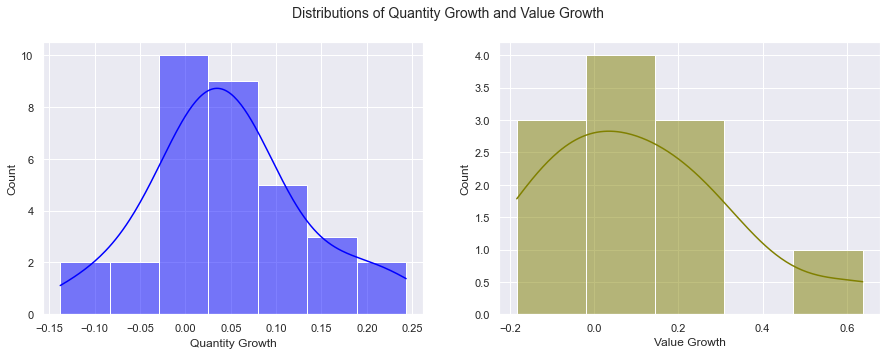

In [9]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distributions of Quantity Growth and Value Growth", fontsize=14)

sns.histplot(data=df_growth, x="Quantity Growth", color="blue", kde=True, ax=axs[0])
sns.histplot(data=df_ie, x="Value Growth", kde=True, color="olive", ax=axs[1])

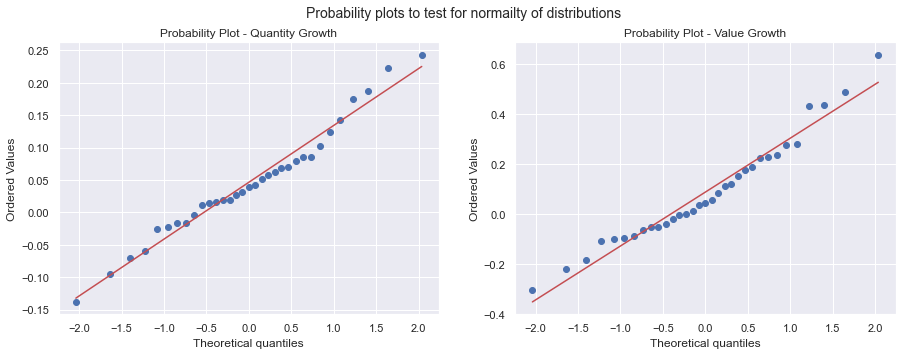

In [10]:
# Use probability plots to test for normal distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Probability plots to test for normailty of distributions", fontsize=14)

prob = stats.probplot(df_growth['Quantity Growth'], plot=ax1)
prob = stats.probplot(df_growth['Value Growth'],plot=ax2)

ax1.set_title('Probability Plot - Quantity Growth')
ax2.set_title('Probability Plot - Value Growth');

In [11]:
print('Quantity Growth: ', stats.shapiro(df_growth['Quantity Growth']))
print('Value Growth: ', stats.shapiro(df_growth['Value Growth']))

Quantity Growth:  ShapiroResult(statistic=0.9766903519630432, pvalue=0.682663083076477)
Value Growth:  ShapiroResult(statistic=0.964688241481781, pvalue=0.34873512387275696)


## 2.3 Inferential Statistics

### 2.3.1 Test - Question the mean growth of butter exports growth (Quantity)
Statement: 
The three top exporters of butter (Ireland, Netherlands and New Zealand) enjoy, on average, 8% growth per year in the export quantity.

This hypothesis test will affirm whether or not the above statement is true. The standard significance level of 0.05 (5%) will be used to determine whether or not the null hypothesis is rejected. 

The null hypothesis sataes that the average export quantity growth for any of the three countries in any year is 10%. The alternative hypothesis states that they mean is not 10%.

H0: mu = 0.08;  H1: mu != 0.08;  
alpha = 0.5; s=0.085756; xbar = 0.048486; n = 33; DoF = 32
    

In [12]:
# Run t-test
stats.ttest_1samp(df_growth['Quantity Growth'],popmean=0.08)

Ttest_1sampResult(statistic=-2.2428843777286893, pvalue=0.03195925594140185)

As the p-value returned (0.03195925594140185) is less than 0.05 (the 5% significance specified to test the hypothesis, the null hypothesis is rejected.
Conclusion: There is not enough evidence to say that the average growth is 8%

In [13]:
# Use the Survival Function to get the p-value to answer the question: 
#    Can it be infered that the average annual quantity growth greater than 8%?
#    Pass the absolute value of the t-statistic returned by the t-test (-2.2428843777286893)
#    The resulting p-value of 0.015979627970700926 indicates that the answer to this question is 'no'. 
#    The inference is that the average growth is less than 8%.
stats.t.sf(2.2428843777286893,32)

0.015979627970700926

#### Same test using bioinfokit

In [14]:
# !pip install bioinfokit
from bioinfokit.analys import stat

In [15]:
res = stat()
res.ttest(df=df_growth, test_type=1, res='Quantity Growth', mu=0.08)
print(res.summary)


One Sample t-test 

------------------  ----------
Sample size         33
Mean                 0.0465177
t                   -2.24288
Df                  32
p value (one-tail)   0.0159796
p value (two-tail)   0.0319593
Lower 95.0%          0.0161099
Upper 95.0%          0.0769255
------------------  ----------


### 2.3.1 Test - Question the mean growth of butter exports growth (Value)
Statement: The three top exporters of butter (Ireland, Netherlands and New Zealand) enjoy, on average, 8% growth per year in the export value.

This hypothesis test will affirm whether or not the above statement is true. The standard significance level of 0.05 (5%) will be used to determine whether or not the null hypothesis is rejected.

The null hypothesis sataes that the average export value growth (k €) for any of the three countries in any year is 8%. The alternative hypothesis states that they mean is not 8%.

H0: mu = 0.08;  H1: mu != 0.08;  
alpha = 0.5; s=0.212208; xbar = 0.087639; n = 33; DoF = 32

In [16]:
# Run t-test
stats.ttest_1samp(df_growth['Value Growth'],popmean=0.08)

Ttest_1sampResult(statistic=0.2067861713720998, pvalue=0.8374870454273002)

As the p-value returned (0.8374870454273002) is greater than 0.05 (the 5% significance specified to test the hypothesis, the null hypothesis is not rejected. 
Conclusion: There is enough evidence to say that the average growth is 8%

In [17]:
res = stat()
res.ttest(df=df_growth, test_type=1, res='Value Growth', mu=0.08)
print(res.summary)


One Sample t-test 

------------------  ----------
Sample size         33
Mean                 0.0876388
t                    0.206786
Df                  32
p value (one-tail)   0.418744
p value (two-tail)   0.837487
Lower 95.0%          0.0123931
Upper 95.0%          0.162885
------------------  ----------


In [18]:
# Use the Survival Function to get the p-value to answer the question: 
#    Can it be infered that the average annual value growth greater than 8%?
#    Pass the absolute value of the t-statistic returned by the t-test (0.2067861713720998)
#    The resulting p-value of 0.4187435227136501 indicates that the answer to this question is 'yes'. 
#    The inference is that the average growth is greater than 8%.
stats.t.sf(0.2067861713720998,32)

0.4187435227136501

### 2.3.1 Confidence Intervals


#### 2.3.1.1 What is the average yearly quantity growth rate? Confidence level of 97%.<br />
alpha/2 = 0.015;  s=0.085756;  xbar = 0.046518;  n = 33; DoF = 32;

In [19]:
xbar = 0.046518 
s = 0.085756 
dof = 32 
confidence = 0.97

# Get the t-critcal value fron the t table
t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

(xbar-s*t_crit/np.sqrt(dof), xbar+s*t_crit/np.sqrt(dof)) 

(0.012087323788255569, 0.08094867621174442)

The conclusion is that the average annual growth in export quantities 
is between 1.2% and 8.1%, with 97% confidence.

#### 2.3.1.2 What is the average yearly quantity growth rate? Confidence level of 97%.<br />
alpha/2 = 0.015;  s=0.212208;  xbar = 0.087639;  n = 33; DoF = 32;

In [20]:
xbar = 0.087639 
s = 0.212208 
dof = 32 
confidence = 0.97

# Get the t-critcal value fron the t table
t_crit = np.abs(stats.t.ppf((1-confidence)/2,dof))

(xbar-s*t_crit/np.sqrt(dof), xbar+s*t_crit/np.sqrt(dof)) 

(0.002438373366973015, 0.172839626633027)

The conclusion is that the average annual growth in export quantities 
is between 0.2% and 17.3%, with 97% confidence.

## 2.4 Comparisons between different countries

<AxesSubplot:xlabel='Value Growth', ylabel='Count'>

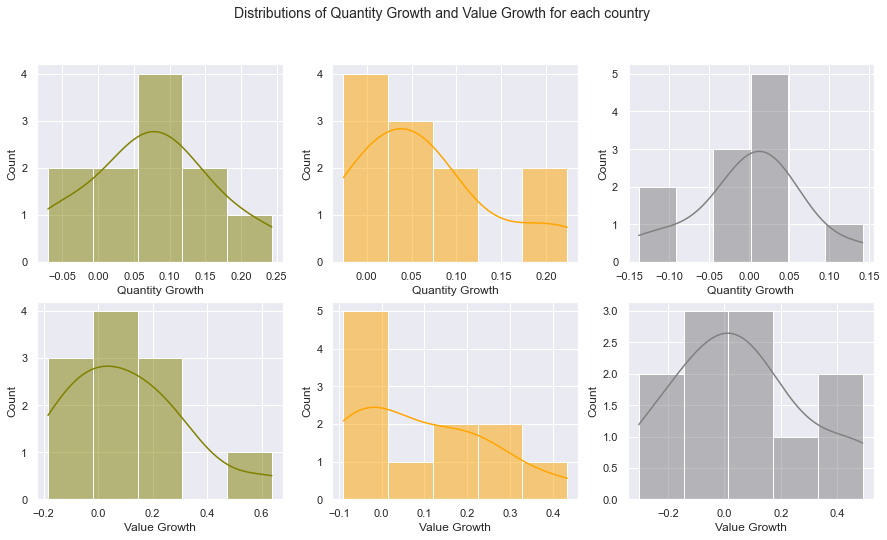

In [21]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Distributions of Quantity Growth and Value Growth for each country", fontsize=14)

sns.histplot(data=df_ie, x="Quantity Growth", kde=True, color="olive", ax=axs[0,0])
sns.histplot(data=df_nl, x="Quantity Growth", kde=True, color="orange", ax=axs[0,1])
sns.histplot(data=df_nz, x="Quantity Growth", kde=True, color="grey", ax=axs[0,2])

sns.histplot(data=df_ie, x="Value Growth", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data=df_nl, x="Value Growth", kde=True, color="orange", ax=axs[1,1])
sns.histplot(data=df_nz, x="Value Growth", kde=True, color="grey", ax=axs[1,2])


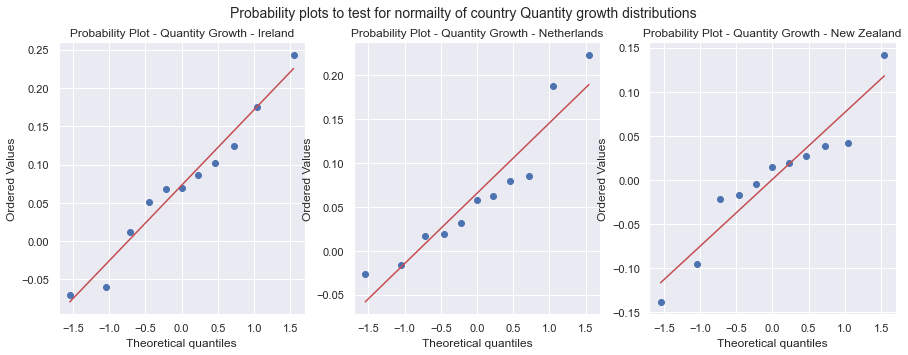

In [22]:
# Use probability plots to test for normal distributions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Probability plots to test for normailty of country Quantity growth distributions", fontsize=14)

prob = stats.probplot(df_ie['Quantity Growth'], plot=ax1)
prob = stats.probplot(df_nl['Quantity Growth'],plot=ax2)
prob = stats.probplot(df_nz['Quantity Growth'],plot=ax3)

ax1.set_title('Probability Plot - Quantity Growth - Ireland')
ax2.set_title('Probability Plot - Quantity Growth - Netherlands')
ax3.set_title('Probability Plot - Quantity Growth - New Zealand');

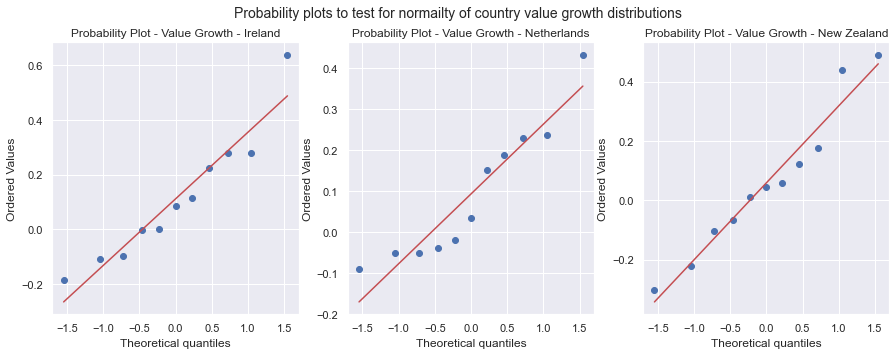

In [23]:
# Use probability plots to test for normal distributions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Probability plots to test for normailty of country value growth distributions", fontsize=14)

prob = stats.probplot(df_ie['Value Growth'], plot=ax1)
prob = stats.probplot(df_nl['Value Growth'],plot=ax2)
prob = stats.probplot(df_nz['Value Growth'],plot=ax3)

ax1.set_title('Probability Plot - Value Growth - Ireland')
ax2.set_title('Probability Plot - Value Growth - Netherlands')
ax3.set_title('Probability Plot - Value Growth - New Zealand');

In [24]:
print(stats.shapiro(df_ie['Quantity Growth']))
print(stats.shapiro(df_nl['Quantity Growth']))
print(stats.shapiro(df_nz['Quantity Growth']))

ShapiroResult(statistic=0.9666106700897217, pvalue=0.850415050983429)
ShapiroResult(statistic=0.8905437588691711, pvalue=0.14125974476337433)
ShapiroResult(statistic=0.9351115226745605, pvalue=0.46483954787254333)


In [25]:
print(stats.shapiro(df_ie['Value Growth']))
print(stats.shapiro(df_nl['Value Growth']))
print(stats.shapiro(df_nz['Value Growth']))

ShapiroResult(statistic=0.9252780079841614, pvalue=0.36507654190063477)
ShapiroResult(statistic=0.8916720747947693, pvalue=0.14590923488140106)
ShapiroResult(statistic=0.950263261795044, pvalue=0.6473198533058167)


<AxesSubplot:xlabel='Value Growth', ylabel='Density'>

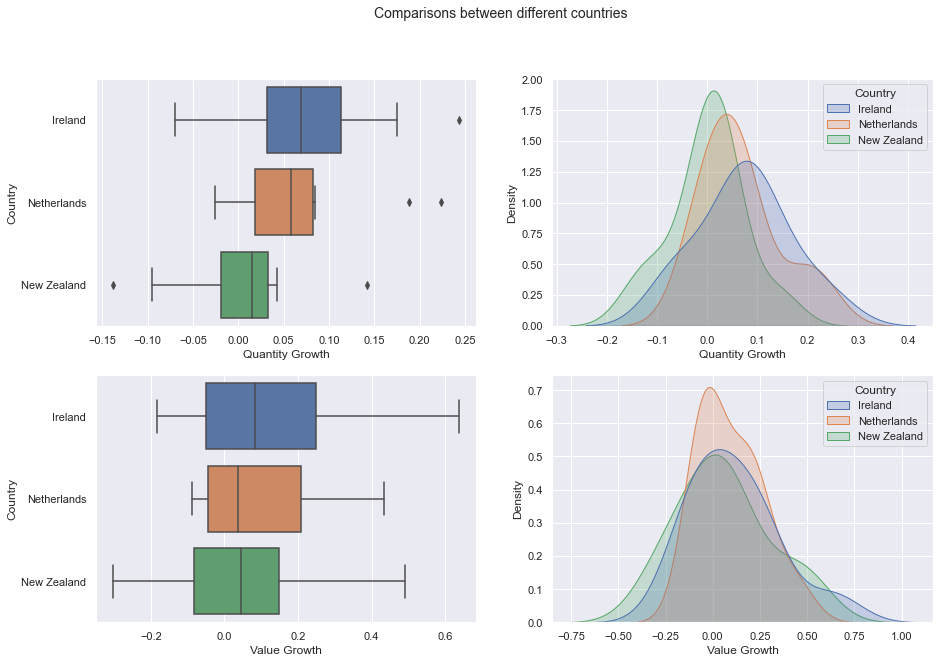

In [26]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Comparisons between different countries", fontsize=14)

sns.boxplot(data=df_growth, x="Quantity Growth", y="Country", ax=axs[0,0])
sns.kdeplot(data=df_growth, x="Quantity Growth", hue="Country", fill=True, ax=axs[0,1])

sns.boxplot(data=df_growth, x="Value Growth", y="Country", ax=axs[1,0])
sns.kdeplot(data=df_growth, x="Value Growth", hue="Country", fill=True, ax=axs[1,1])


### 2.4.1 Paired t-test
To check the relation between Quantity Growth and Value Growth in each of the countries.<br />
The null hypothesis states that the true mean difference between Quantity Growth and Value Growth is zero.<br />
This test is run for each country seperately. A significance level of 0.05 is assumed.<br />
H0: muQuantity = muValue; H1: muQuantity != muValue

In [27]:
print('Ireland: ',stats.ttest_rel(df_ie['Quantity Growth'], df_ie['Value Growth']))
print('Netherlands: ',stats.ttest_rel(df_nl['Quantity Growth'], df_nl['Value Growth']))
print('New Zealand: ',stats.ttest_rel(df_nz['Quantity Growth'], df_nz['Value Growth']))

Ireland:  Ttest_relResult(statistic=-0.5319233417659759, pvalue=0.6063936016203461)
Netherlands:  Ttest_relResult(statistic=-0.43587905748012473, pvalue=0.6721834476873403)
New Zealand:  Ttest_relResult(statistic=-0.7711893475093325, pvalue=0.4584292954190151)


All 3 p-values are greater than 0.05. The null hypothesis holds true in each instance.

### 2.4.2 Direct Comparisons between Ireland and other countries - two-sample t-tests
To compare the relation between Quantity Growth and Value Growth in each of the countries<br />

The null hypothesis states that there is not a statistically significant difference between the means of Ireland and the other country.<br />
A significance level of 0.05 is assumed.

In [28]:
# H0: muIE = muNL; H1: muIE != muNL
stats.ttest_ind(df_ie['Quantity Growth'],df_nl['Quantity Growth'],equal_var=True)

Ttest_indResult(statistic=0.19988251930303447, pvalue=0.8435908183478085)

In [29]:
# H0: muIE = muNZ; H1: muIE != muNZ
stats.ttest_ind(df_ie['Quantity Growth'],df_nz['Quantity Growth'],equal_var=True)

Ttest_indResult(statistic=2.0278532167767493, pvalue=0.05610753460434661)

Both p-values are greater than 0.05. The null hypothesis holds true in each instance. 

### 2.4.3 Mann-Whitney U test
Non-parametric test to verify the results of the two-sample t-tests<br />
A significance level of 0.05 is assumed

In [30]:
# H0: muIE = muNL; H1: muIE != muNL
stats.mannwhitneyu(x=df_ie['Quantity Growth'], y=df_nl['Quantity Growth'], alternative = 'two-sided')

MannwhitneyuResult(statistic=68.0, pvalue=0.6457638203049723)

In [31]:
# H0: muIE = muNZ; H1: muIE != muNZ
stats.mannwhitneyu(x=df_ie['Quantity Growth'], y=df_nz['Quantity Growth'], alternative = 'two-sided')

MannwhitneyuResult(statistic=91.0, pvalue=0.048844064174274296)

### 2.4.4 Analysis of Varience
To compare the means of all three countries <br />
H0: muIE = muNL = muNZ<br />
H1: Atleast one mean is different<br />
A significance level of 0.05 is assumed

Conditions of ANOVA<br />
1. Indepence is assumed as all data are from different countries
2. Normality of all three distributions was proven above
3. The variaences of all three distributions are equal: levene test used  

In [32]:
# Use levene test to check for equality of variability in the distribution of 
# Quantity Growth in all three countries
stats.levene(df_ie['Quantity Growth'],df_nl['Quantity Growth'],df_nz['Quantity Growth'],center='mean')

LeveneResult(statistic=0.24135272763649698, pvalue=0.7870751050004449)

In [33]:
# Use levene test to check for equality of variability in the distribution of 
# Value Growth in all three countries
stats.levene(df_ie['Value Growth'],df_nl['Value Growth'],df_nz['Value Growth'],center='mean')

LeveneResult(statistic=0.3132610753391103, pvalue=0.7334214087291262)

In both cases, the p-values are greater than 0.05. The null hypothesis is not rejected for either variable. The variances can be assumed to be equal. 

In [34]:
# Perform one-way ANOVA on the Quantity Growth variable
stats.f_oneway(df_ie['Quantity Growth'], df_nl['Quantity Growth'], df_nz['Quantity Growth'])

F_onewayResult(statistic=2.595033556987333, pvalue=0.09130980053158307)

The p-value is greater than 0.05. The null hypothesis id not rejected.

In [35]:
# Perform one-way ANOVA on the Value Growth variable
stats.f_oneway(df_ie['Value Growth'], df_nl['Value Growth'], df_nz['Value Growth'])

F_onewayResult(statistic=0.1655002484155105, pvalue=0.8482381053699203)

The p-value is greater than 0.05. The null hypothesis id not rejected.

### 2.4.5 Kruskal-Wallis Test
Non-parametric test to verify the results of the ANOVA tests<br />
H0: muIE = muNL = muNZ<br />
H1: Atleast one mean is different<br />
A significance level of 0.05 is assumed

In [36]:
# Quantity Growth

#perform Kruskal-Wallis Test 
stats.kruskal(df_ie['Quantity Growth'], df_nl['Quantity Growth'], df_nz['Quantity Growth'])

KruskalResult(statistic=5.217306757413709, pvalue=0.07363363364877111)

The p-value of 0.07363363364877111 corresponds to pvalue=0.09130980053158307 result from the ANOVA. The ANOVA result is regarded as being more accurate because it is a parametric test. However, the similarity of the two p-values helps to verify the result of the first test.

In [37]:
# Value Growth

#perform Kruskal-Wallis Test 
stats.kruskal(df_ie['Value Growth'], df_nl['Value Growth'], df_nz['Value Growth'])

KruskalResult(statistic=0.28585318424889294, pvalue=0.8668176978057169)

The p-value of 0.8668176978057169 corresponds to pvalue=0.8482381053699203 result from the ANOVA. The ANOVA result is regarded as being more accurate because it is a parametric test. However, the similarity of the two p-values helps to verify the result of the first test.